In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def initialize_weights(input_size, hidden_sizes, output_size):
    sizes = [input_size] + hidden_sizes + [output_size]
    weights = [np.random.rand(sizes[i], sizes[i+1]) for i in range(len(sizes)-1)]
    biases = [np.zeros((1, size)) for size in sizes[1:]]
    return weights, biases

def forward_pass(X, weights, biases):
    layer_outputs = []
    input_layer = X
    for i in range(len(weights) - 1):
        layer_input = np.dot(input_layer, weights[i]) + biases[i]
        layer_output = sigmoid(layer_input)
        layer_outputs.append(layer_output)
        input_layer = layer_output

    output_layer_input = np.dot(input_layer, weights[-1]) + biases[-1]
    output_layer_output = softmax(output_layer_input)
    layer_outputs.append(output_layer_output)

    return layer_outputs

def backward_pass(X, y, weights, biases, layer_outputs, learning_rate):
    error = y - layer_outputs[-1]
    deltas = [error]

    for i in range(len(layer_outputs) - 2, -1, -1):
        error = deltas[-1].dot(weights[i+1].T)
        delta = error * sigmoid_derivative(layer_outputs[i])
        weights[i] += layer_outputs[i].T.dot(delta) * learning_rate
        biases[i] += np.sum(delta, axis=0, keepdims=True) * learning_rate
        deltas.append(delta)

    return weights, biases

def one_hot_encode(labels):
    encoder = OneHotEncoder(sparse=False, categories='auto')
    labels_onehot = encoder.fit_transform(labels.reshape(-1, 1))
    return labels_onehot

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encode the target labels
y_onehot = one_hot_encode(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Neural network parameters
input_size = X_train.shape[1]
hidden_sizes = [4, 4]  # Adjust the number of neurons in each hidden layer as needed
output_size = y_train.shape[1]
learning_rate = 0.01
epochs = 40000

# Initialize weights and biases
weights, biases = initialize_weights(input_size, hidden_sizes, output_size)

# Training the neural network
for epoch in range(epochs):
    # Forward pass
    layer_outputs = forward_pass(X_train, weights, biases)

    # Backward pass
    weights, biases = backward_pass(X_train, y_train, weights, biases, layer_outputs, learning_rate)

    if epoch % 1000 == 0:
        loss = -np.sum(y_train * np.log(layer_outputs[-1])) / len(X_train)
        print(f"Epoch {epoch}, Cross-Entropy Loss: {loss}")

# Testing the trained model
test_outputs = forward_pass(X_test, weights, biases)[-1]
predicted_labels = np.argmax(test_outputs, axis=1)
true_labels = np.argmax(y_test, axis=1)

accuracy = np.sum(predicted_labels == true_labels) / len(true_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 0, Cross-Entropy Loss: 1.2152942992583469
Epoch 1000, Cross-Entropy Loss: 0.9557298503477524
Epoch 2000, Cross-Entropy Loss: 0.9425536218765534
Epoch 3000, Cross-Entropy Loss: 0.9226985119958471
Epoch 4000, Cross-Entropy Loss: 0.9083471960556811
Epoch 5000, Cross-Entropy Loss: 0.9038770258303153
Epoch 6000, Cross-Entropy Loss: 0.9083535863282624
Epoch 7000, Cross-Entropy Loss: 0.9197626862396769
Epoch 8000, Cross-Entropy Loss: 0.9219409106380727
Epoch 9000, Cross-Entropy Loss: 0.9247612084074235
Epoch 10000, Cross-Entropy Loss: 0.9250171050963815
Epoch 11000, Cross-Entropy Loss: 0.9233591990723679
Epoch 12000, Cross-Entropy Loss: 0.9246147578697002
Epoch 13000, Cross-Entropy Loss: 0.9239011968146867
Epoch 14000, Cross-Entropy Loss: 0.923210176086313
Epoch 15000, Cross-Entropy Loss: 0.9188219421709001
Epoch 16000, Cross-Entropy Loss: 0.9162040729416248
Epoch 17000, Cross-Entropy Loss: 0.9168522119390964
Epoch 18000, Cross-Entropy Loss: 0.9146960124918525
Epoch 19000, Cross-Entropy

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

# Load dataset
df = pd.read_csv("/content/backpropagationNNdataset.csv")
df.head()

def sigmoid(x):
    s = np.zeros((1, len(x[0])))
    for i in range(0, len(x[0])):
        s[0, i] = 1 / (1 + math.exp(-x[0, i]))
    return s

# Helper function to calculate the hard threshold for output
def hard_threshold(x):
    ot = 0
    if(x < 0.25):
        ot = 0
    else:
        ot = 1
    return ot

def feedforward(W1, W2, b1, b2, Xvec):
    out = np.zeros((len(Xvec), 1))
    # Feedforward propagation
    for i in range(0, len(Xvec)):
        z1 = Xvec[i].dot(W1) + b1
        a2 = sigmoid(z1)
        z2 = a2.dot(W2) + b2
        a3 = sigmoid(z2)
        # Applying hard threshold
        out[i] = hard_threshold(a3)
    return out

# Model to train and test
def train_test_model(trainSet, testSet, trainSetout, testSetout):
    # Initialize the weight and bias vector
    np.random.seed(100)
    # Taking small random values for weights
    # Number of nodes in hidden layer is chosen 3
    print("Setting Initial values for weights to small random value")
    W1 = np.random.random((2, 3)) / 1000  # 2-input and hidden layer 3-neurons
    W2 = np.random.random((3, 1)) / 1000
    print("W1=", W1)
    print("W2=", W2)
    print("\n")
    # Initializing bias as zeros
    b1 = np.zeros((1, 3))  # 1X3 matrix
    b2 = np.zeros((1, 1))
    ErrorData = np.zeros((320, 1))  # Planning to track error over 320 epochs

    # Training the trainset data (80% of data)
    print("Starting to train the model with the training set(80% data)")
    # Iteration over the trainset length
    for k in range(0, len(trainSet)):
        for i in range(0, 1500):
            # Perform feedforward pass
            z1 = trainSet[k].dot(W1) + b1
            a2 = sigmoid(z1)
            z2 = a2.dot(W2) + b2
            a3 = sigmoid(z2)
            # Taking alpha value as 0.01 as learning rate
            alpha = 0.01
            # Backpropagation pass
            # Output layer weight adjustment
            f_z3 = a3 * (1 - a3)
            Err3 = y[k] - a3
            delta3 = f_z3 * Err3
            for i in range(0, len(W2)):
                W2[i, 0] = W2[i, 0] + alpha * a2[0, i] * delta3
                # Output layer bias adjustment
                b2 = b2 + alpha * delta3
            # Hidden layer weight adjustment
            f_z2 = a2 * (1 - a2)
            delta1_2 = f_z2[0, 0] * W2[0, 0] * delta3
            delta2_2 = f_z2[0, 1] * W2[1, 0] * delta3
            delta1_2 = f_z2[0, 2] * W2[2, 0] * delta3
            W1[0, 0] = W1[0, 0] + alpha * trainSet[k, 0] * delta1_2
            W1[0, 1] = W1[0, 1] + alpha * trainSet[k, 0] * delta2_2


## **Backpropagation**

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import pandas as pd
import numpy as np

# %matplotlib inline
df=pd.read_csv("/content/backpropagationNNdataset.csv")
df.head()

,class,X0,X1
0,1,2.071069,0.411529
1,0,-0.335398,1.032266
2,1,1.256631,-0.363937
3,1,1.269361,-0.379086
4,0,-0.839940,0.203669


from matplotlib import pyplot as plt
_df_0['class'].plot(kind='hist', bins=20, title='class')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['X0'].plot(kind='hist', bins=20, title='X0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['X1'].plot(kind='hist', bins=20, title='X1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='class', y='X0', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='X0', y='X1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['class'].plot(kind='line', figsize=(8, 4), title='class')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['X0'].plot(kind='line', figsize=(8, 4), title='X0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['X1'].plot(kind='line', figsize=(8, 4), title='X1')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
def sigmoid(x):
 s = np.zeros((1, len(x[0])))
 for i in range (0, len(x[0])):
   s[0,i]= 1 / (1 + math.exp(-x[0,i]))
 return s

In [ ]:
#helper function to calculate the hard threshold for output
def hard_threshold(x):
  ot=0
  if(x<0.25):
    ot=0
  else:
    ot=1
  return ot

In [ ]:
def feedforward(W1,W2,b1,b2,Xvec):
  out=np.zeros((len(Xvec),1))
  #Feedforward propagation
  for i in range(0,len(Xvec)):
    z1=Xvec[i].dot(W1)+b1
    a2=sigmoid(z1)
    z2=a2.dot(W2)+b2
    a3=sigmoid(z2)
    #Applying hard threshold
    out[i]=hard_threshold(a3)
  return out

Setting initial values for weights to small random value
W1=  [[5.43404942e-04 2.78369385e-04 4.24517591e-04]
 [8.44776132e-04 4.71885619e-06 1.21569121e-04]]
W2=  [[0.00067075]
 [0.00082585]
 [0.00013671]]


Starting to train the model with the training set (80% data)


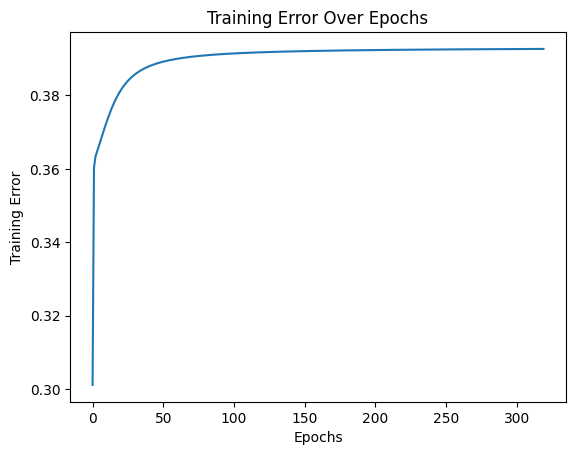

In [ ]:
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import pandas as pd
import numpy as np

# %matplotlib inline
df=pd.read_csv("/content/backpropagationNNdataset.csv")
df.head()

def sigmoid(x):
    s = np.zeros((1, len(x[0])))
    for i in range(0, len(x[0])):
        s[0, i] = 1 / (1 + math.exp(-x[0, i]))
    return s

def hard_threshold(x):
    ot = 0
    if x < 0.5:
        ot = 0
    else:
        ot = 1
    return ot

def feedforward(W1, W2, b1, b2, Xvec):
    out = np.zeros((len(Xvec), 1))
    for i in range(0, len(Xvec)):
        z1 = Xvec[i].dot(W1) + b1
        a2 = sigmoid(z1)
        z2 = a2.dot(W2) + b2
        a3 = sigmoid(z2)
        out[i] = hard_threshold(a3)
    return out

def train_test_model(trainSet, testSet, trainSetout, testSetout):
    np.random.seed(100)
    print("Setting initial values for weights to small random value")
    W1 = np.random.random((2, 3)) / 1000
    W2 = np.random.random((3, 1)) / 1000
    print("W1= ", W1)
    print("W2= ", W2)
    print("\n")
    b1 = np.zeros((1, 3))
    b2 = np.zeros((1, 1))
    ErrorData = np.zeros((320, 1))


    print("Starting to train the model with the training set (80% data)")
    for epoch in range(0, 320):
        total_error = 0
        for k in range(0, len(trainSet)):
            for i in range(0, 1500):
                z1 = trainSet[k].dot(W1) + b1
                a2 = sigmoid(z1)
                z2 = a2.dot(W2) + b2
                a3 = sigmoid(z2)
                alpha = 0.01

                f_z3 = a3 * (1 - a3)
                Err3 = trainSetout[k] - a3
                delta3 = f_z3 * Err3

                for j in range(0, len(W2)):
                    W2[j, 0] = W2[j, 0] + alpha * a2[0, j] * delta3

                b2 = b2 + alpha * delta3

                f_z2 = a2 * (1 - a2)
                delta1_2 = f_z2[0, 0] * W2[0, 0] * delta3
                delta2_2 = f_z2[0, 1] * W2[1, 0] * delta3
                delta3_2 = f_z2[0, 2] * W2[2, 0] * delta3

                W1[0, 0] = W1[0, 0] + alpha * trainSet[k, 0] * delta1_2
                W1[0, 1] = W1[0, 1] + alpha * trainSet[k, 0] * delta2_2

                total_error += np.abs(Err3)



        # Update ErrorData with the average error for the epoch
        ErrorData[epoch] = total_error / (len(trainSet) * 1500)


    # Plot the training error over epochs
    plt.plot(ErrorData)
    plt.xlabel('Epochs')
    plt.ylabel('Training Error')
    plt.title('Training Error Over Epochs')
    plt.show()

    return W1, W2, b1, b2

# Example usage:
# Define your training and testing datasets
trainSet = np.array([[1, 0], [0, 1], [1, 1], [0, 0]])  # Example training data
testSet = np.array([[1, 0], [0, 1]])  # Example testing data
trainSetout = np.array([[1], [1], [0], [0]])  # Example training labels
testSetout = np.array([[1], [0]])  # Example testing labels

# Call the train_test_model function
W1, W2, b1, b2 = train_test_model(trainSet, testSet, trainSetout, testSetout)

Setting initial values for weights to small random value
W1=  [[5.43404942e-04 2.78369385e-04 4.24517591e-04]
 [8.44776132e-04 4.71885619e-06 1.21569121e-04]]
W2=  [[0.00067075]
 [0.00082585]
 [0.00013671]]


Starting to train the model with the training set (80% data)


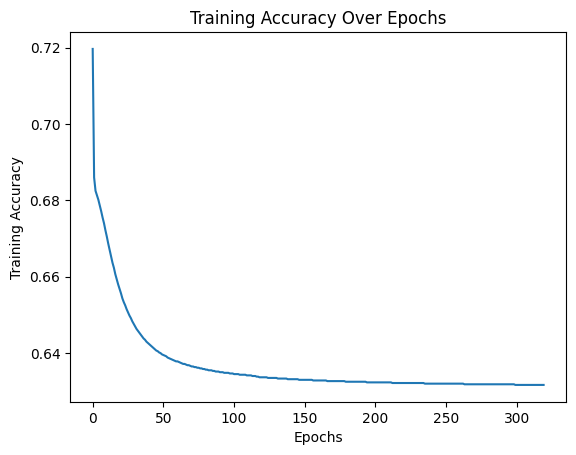

In [ ]:
def train_test_model(trainSet, testSet, trainSetout, testSetout):
    np.random.seed(100)
    print("Setting initial values for weights to small random value")
    W1 = np.random.random((2, 3)) / 1000
    W2 = np.random.random((3, 1)) / 1000
    print("W1= ", W1)
    print("W2= ", W2)
    print("\n")
    b1 = np.zeros((1, 3))
    b2 = np.zeros((1, 1))
    ErrorData = np.zeros((320, 1))
    AccuracyData = np.zeros((320, 1))  # Array to store accuracy over epochs

    print("Starting to train the model with the training set (80% data)")
    for epoch in range(0, 320):
        total_error = 0
        correct_predictions = 0  # Initialize correct predictions counter
        for k in range(0, len(trainSet)):
            for i in range(0, 1500):
                z1 = trainSet[k].dot(W1) + b1
                a2 = sigmoid(z1)
                z2 = a2.dot(W2) + b2
                a3 = sigmoid(z2)
                alpha = 0.01

                f_z3 = a3 * (1 - a3)
                Err3 = trainSetout[k] - a3
                delta3 = f_z3 * Err3

                for j in range(0, len(W2)):
                    W2[j, 0] = W2[j, 0] + alpha * a2[0, j] * delta3

                b2 = b2 + alpha * delta3

                f_z2 = a2 * (1 - a2)
                delta1_2 = f_z2[0, 0] * W2[0, 0] * delta3
                delta2_2 = f_z2[0, 1] * W2[1, 0] * delta3
                delta3_2 = f_z2[0, 2] * W2[2, 0] * delta3

                W1[0, 0] = W1[0, 0] + alpha * trainSet[k, 0] * delta1_2
                W1[0, 1] = W1[0, 1] + alpha * trainSet[k, 0] * delta2_2

                total_error += np.abs(Err3)

                # Check if prediction matches the ground truth
                if hard_threshold(a3) == trainSetout[k]:
                    correct_predictions += 1

        # Update ErrorData and AccuracyData for the epoch
        ErrorData[epoch] = total_error / (len(trainSet) * 1500)
        AccuracyData[epoch] = correct_predictions / (len(trainSet) * 1500)

    # Plot the training accuracy over epochs
    plt.plot(AccuracyData)
    plt.xlabel('Epochs')
    plt.ylabel('Training Accuracy')
    plt.title('Training Accuracy Over Epochs')
    plt.show()

    return W1, W2, b1, b2

# Example usage:
# Define your training and testing datasets
trainSet = np.array([[1, 0], [0, 1], [1, 1], [0, 0]])  # Example training data
testSet = np.array([[1, 0], [0, 1]])  # Example testing data
trainSetout = np.array([[1], [1], [0], [0]])  # Example training labels
testSetout = np.array([[1], [0]])  # Example testing labels

# Call the train_test_model function
W1, W2, b1, b2 = train_test_model(trainSet, testSet, trainSetout, testSetout)

## **Optimizer**

11490434/11490434 [==============================] - 0s 0us/step


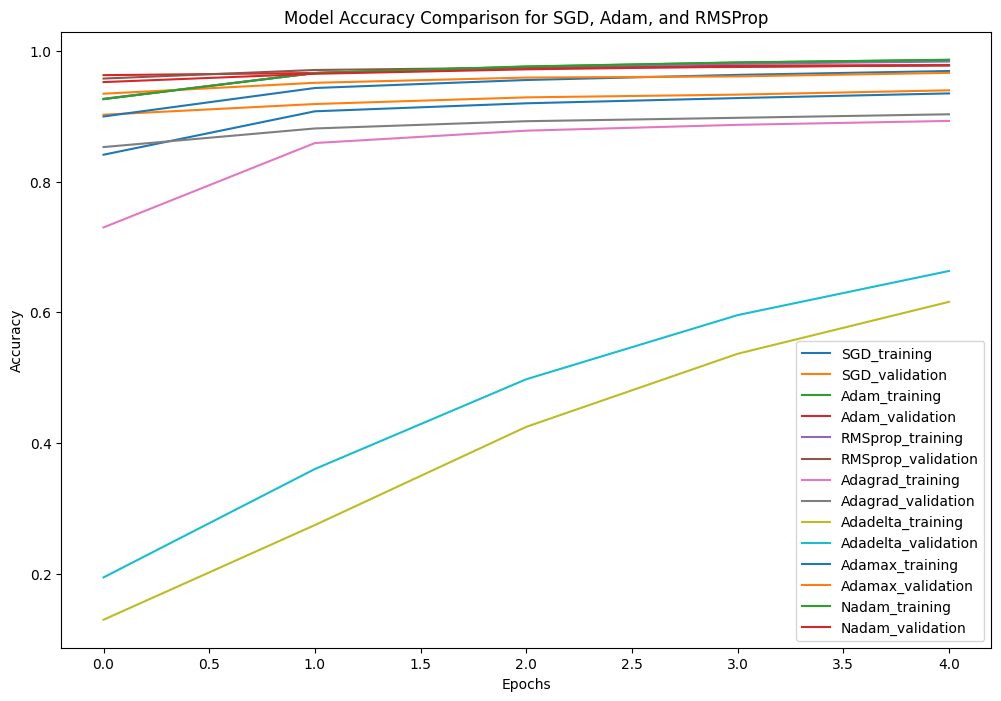

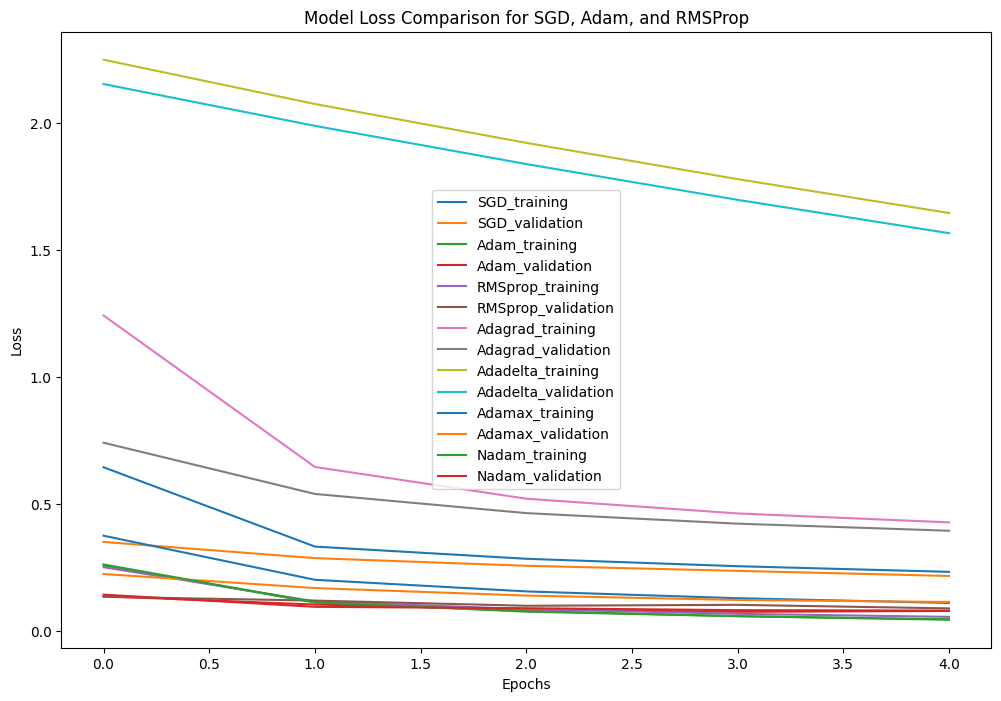

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD,Adam,RMSprop,Adagrad,Adadelta,Adamax,Nadam

optimizers = ['sgd', 'adam', 'rmsprop', 'adagrad', 'adadelta', 'adamax', 'nadam']
optimizer_names = ['SGD','Adam','RMSprop','Adagrad','Adadelta','Adamax','Nadam']
# Load the dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0
plt.figure(figsize=(12, 8))

for i in range(len(optimizers)):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=optimizers[i],
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)

    plt.plot(history.history['accuracy'], label=f'{optimizer_names[i]}_training')
    plt.plot(history.history['val_accuracy'], label=f'{optimizer_names[i]}_validation')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Comparison for SGD, Adam, and RMSProp')
plt.show()

plt.figure(figsize=(12, 8))

for i in range(len(optimizers)):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=optimizers[i],
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)

    plt.plot(history.history['loss'], label=f'{optimizer_names[i]}_training')
    plt.plot(history.history['val_loss'], label=f'{optimizer_names[i]}_validation')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Comparison for SGD, Adam, and RMSProp')
plt.show()